<a href="https://colab.research.google.com/github/Stivaly/Stivaly/blob/main/1er_Proyecto_con_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido a mi primer proyecto con Python y Pandas.

Dataset 1: Valor Casas Usadas, Chile, RM, 18/07/2023

link: https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023

Dataset 2: Censo 2017 Viviendas INE

Link: https://www.ine.gob.cl/estadisticas/sociales/censos-de-poblacion-y-vivienda/censo-de-poblacion-y-vivienda

In [26]:
from google.colab import drive

# Esto montará Google Drive en la carpeta '/content/drive/'
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

casas = pd.read_csv('/content/drive/MyDrive/Inmersión Datos Alura/Precios Casas RM.csv') #Asignamos variable a cada una de las tablas
web = pd.read_csv('/content/drive/MyDrive/Inmersión Datos Alura/Propiedades Web Scrape.csv')
censo = censo = pd.read_csv('/content/drive/MyDrive/1er proyecto/Microdato_Censo2017-Viviendas.csv', sep = ';')

Con la siguiente linea eliminamos quien publicó estos inmuebles, ya que en muchos casos son personas, para proteger su privacidad realizo este paso, el cual elimina la columna de los resultados dentro del notebook pero no modifica el dataset original.

In [28]:
web.drop('Realtor', axis=1, inplace=True)
casas.drop('Realtor', axis=1, inplace=True)

In [29]:
web.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id
0,129884400,3600.00,158396.00,Lampa,AvenidaLaHacienda,3.00,2.00,68.00,221.00,1.00,7850612
1,130000000,3603.00,158537.00,Buin,Villaseca,5.00,3.00,150.00,190.00,2.00,10081485
2,172998805,4795.00,210974.00,PuenteAlto,BarrioAustria,4.00,3.00,90.00,182.00,3.00,10257247
3,135296250,3750.00,164995.00,Buin,ComercianteArmandoPérezCarrasco,3.00,2.00,85.00,175.00,1.00,20153043
4,195000000,5405.00,237805.00,QuintaNormal,Hostos,3.00,3.00,130.00,402.00,1.00,16669338


In [30]:
casas.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.00,384.00,732.00,3.00,11700213
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.00,112.00,145.00,1.00,10894299
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.00,59.00,243.00,2.00,10257635
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.00,103.00,73.00,1.00,9232092
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.00,57.00,67.00,1.00,7085397


# Data Cleaning
Iniciamos acá nuestro proceso de limpieza de datos donde crearemos una nueva variable de precio que se represente en un campo mas legible

In [31]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 668.6+ KB


In [32]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   9291 non-null   int64  
 1   Price_UF    9291 non-null   float64
 2   Price_USD   9291 non-null   float64
 3   Comuna      9291 non-null   object 
 4   Ubicacion   9291 non-null   object 
 5   Dorms       9202 non-null   float64
 6   Baths       9138 non-null   float64
 7   Built Area  9013 non-null   float64
 8   Total Area  9057 non-null   float64
 9   Parking     6371 non-null   float64
 10  id          9291 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 798.6+ KB


*A continuación realizamos el formato de la variable price_clp, price_uf y price_clp de entero a flotante y realizamos disminución de ceros para su legibilidad.* ✅

In [33]:
web['precio_millon_clp'] = web.Price_CLP.astype('float')/1000000
web['precio_mil_uf'] = web.Price_UF.astype('float')/1000
web['precio_mil_usd'] = web.Price_USD.astype('float')/1000
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
web[['precio_millon_clp', 'precio_mil_uf', 'precio_mil_usd', 'Comuna']]

,precio_millon_clp,precio_mil_uf,precio_mil_usd,Comuna
0,129.88,3.60,158.40,Lampa
1,130.00,3.60,158.54,Buin
2,173.00,4.79,210.97,PuenteAlto
3,135.30,3.75,165.00,Buin
4,195.00,5.41,237.81,QuintaNormal
...,...,...,...,...
9286,80.00,2.22,97.56,PuenteAlto
9287,250.00,6.93,304.88,PuenteAlto
9288,3788.30,105.00,4619.87,LasCondes
9289,577.26,16.00,703.98,LaPintana


In [34]:
casas['precio_millon_clp'] = casas.Price_CLP.astype('float')/1000000
casas['precio_mil_uf'] = casas.Price_UF.astype('float')/1000
casas['precio_mil_usd'] = casas.Price_USD.astype('float')/1000
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
casas[['precio_millon_clp', 'precio_mil_uf', 'precio_mil_usd', 'Comuna']]

,precio_millon_clp,precio_mil_uf,precio_mil_usd,Comuna
0,409.29,11.50,509.69,QuintaNormal
1,105.00,2.95,130.76,PedroAguirreCerda
2,128.12,3.60,159.56,EstaciónCentral
3,75.00,2.11,93.40,Colina
4,53.00,1.49,66.00,Colina
...,...,...,...,...
7774,2491.30,70.00,3102.49,LasCondes
7775,242.01,6.80,301.38,Peñalolén
7776,3736.95,105.00,4653.74,LasCondes
7777,569.44,16.00,709.14,LaPintana


Eliminamos columnas duplicadas que contienen la misma información


*identificador de regiones:*
https://www.suseso.cl/606/articles-19445_recurso_1.pdf

Se escoge region 13 correspondiente a metropolitana, para la pregunta 1 (P01) se escoge 1 correspondiente a casa para poder cruzar con los datos de casas

In [35]:
censo.drop(['REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R'], axis=1, inplace=True)

In [36]:
viviendas_santiago = censo.query('REGION == 13 & P01 == 1')

# Data Process

*Realizamos primero un conteo para verificar cuantos inmuebles hay a la venta por comuna, sorteamos decendente dando como resultado el top 5 de comunas con más inmuebles a la venta.*

In [37]:
conteo_comuna = web['Comuna'].value_counts()

top5_web = conteo_comuna.sort_values(ascending=False).head(5)

top5_frame = pd.DataFrame(top5_web)
top5_frame

,Comuna
LasCondes,939
PuenteAlto,816
Maipú,738
Colina,693
LoBarnechea,577


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

*Primer gráfico a continuación donde tenemos el top 5 de comunas con mayor cantidad de inmuebles a la venta.*

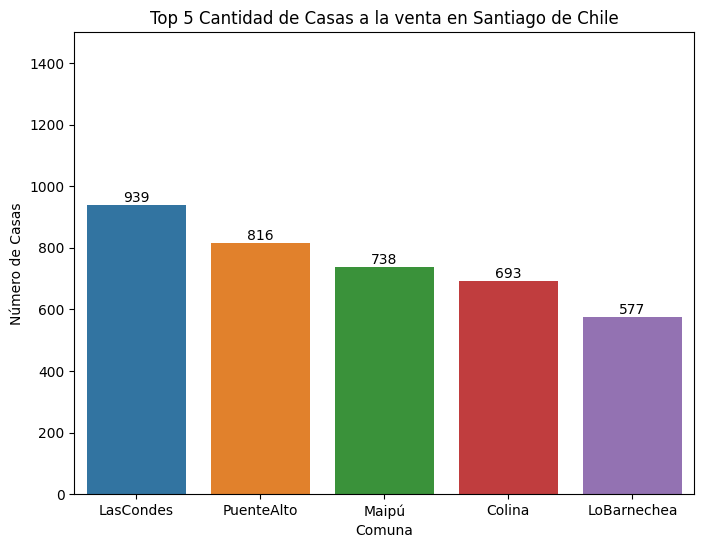

In [39]:
plt.figure(figsize=(8,6))
graphic = sns.barplot(x=top5_frame.index, y=top5_frame['Comuna'])
graphic.set_title('Top 5 Cantidad de Casas a la venta en Santiago de Chile')
plt.xlabel('Comuna')
plt.ylabel('Número de Casas')
plt.ylim(0,1500)

for labels in graphic.patches:
    graphic.annotate(f'{int(labels.get_height())}', (labels.get_x() + labels.get_width() / 2., labels.get_height()),
                ha='center', va='bottom')

plt.show()

*Nuestro segundo paso es verificar el promedio del precio de las Casas en Santiago para cada comuna*

In [49]:
promedio_comuna = []
promedio_comuna = web[['Comuna', 'precio_millon_clp']].value_counts()[:10].index
"""
promedio_comuna = promedio_comuna['Comuna']
promedio_comuna = promedio_comuna.sort_values(ascending=False)
promedio_frame = pd.DataFrame(promedio_comuna)
promedio_frame.reset_index(inplace=True)
promedio_frame
"""

"\npromedio_comuna = promedio_comuna['Comuna']\npromedio_comuna = promedio_comuna.sort_values(ascending=False)\npromedio_frame = pd.DataFrame(promedio_comuna)\npromedio_frame.reset_index(inplace=True)\npromedio_frame\n"

In [ ]:
plt.figure(figsize=(10,6))
prom_ejex= promedio_frame.head(7)
graphic_2 = sns.boxplot(x=prom_ejex.index, y=prom_ejex['precio_millon_clp'], data=promedio_frame.query())
graphic_2.set_title('Valor promedio de casas a la venta en Santiago de Chile')
plt.xlabel('Comuna')
plt.ylabel('Promedio en Millones')
plt.ylim(0,1500)


"""for labels in graphic_2.patches:
    graphic_2.annotate(f'{int(labels.get_height())}', (labels.get_x() + labels.get_width() / 2., labels.get_height()),
                ha='center', va='bottom')"""

plt.show()

Construimos diccionario de comunas para poder cruzar con nuestro dataset del INE

In [51]:
comunas_censo = {
    13101: "Santiago",
    13102: "Cerrillos",
    13103: "Cerro Navia",
    13104: "Conchalí",
    13105: "El Bosque",
    13106: "Estación Central",
    13107: "Huechuraba",
    13108: "Independencia",
    13109: "La Cisterna",
    13110: "La Florida",
    13111: "La Granja",
    13112: "La Pintana",
    13113: "La Reina",
    13114: "Las Condes",
    13115: "Lo Barnechea",
    13116: "Lo Espejo",
    13117: "Lo Prado",
    13118: "Macul",
    13119: "Maipú",
    13120: "Ñuñoa",
    13121: "Pedro Aguirre Cerda",
    13122: "Peñalolén",
    13123: "Providencia",
    13124: "Pudahuel",
    13125: "Quilicura",
    13126: "Quinta Normal",
    13127: "Recoleta",
    13128: "Renca",
    13129: "San Joaquín",
    13130: "San Miguel",
    13131: "San Ramón",
    13132: "Vitacura",
    13201: "Puente Alto",
    13202: "Pirque",
    13203: "San José de Maipo",
    13301: "Colina",
    13302: "Lampa",
    13303: "Tiltil",
    13401: "San Bernardo",
    13402: "Buin",
    13403: "Calera de Tango",
    13404: "Paine",
    13501: "Melipilla",
    13502: "Alhué",
    13503: "Curacaví",
    13504: "María Pinto",
    13505: "San Pedro",
    13601: "Talagante",
    13602: "El Monte",
    13603: "Isla de Maipo",
    13604: "Padre Hurtado",
    13605: "Peñaflor"
}

In [52]:
viviendas_santiago['Nombre_comuna'] = viviendas_santiago['COMUNA'].map(comunas_censo)
viviendas_santiago

<ipython-input-52-72337dc1b86b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viviendas_santiago['Nombre_comuna'] = viviendas_santiago['COMUNA'].map(comunas_censo)


,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,P01,P02,P03A,P03B,P03C,P04,P05,CANT_HOG,CANT_PER,Nombre_comuna
230194,13,136,13605,1,1,1,12952,1,1,1,1,1,1,3,1,1,4,Peñaflor
230195,13,136,13605,1,1,1,12952,2,1,1,2,3,1,3,1,1,2,Peñaflor
230196,13,136,13605,1,1,1,12952,3,1,1,2,3,1,3,1,1,5,Peñaflor
230197,13,136,13605,1,1,1,12952,4,1,1,5,3,1,3,1,1,3,Peñaflor
230198,13,136,13605,1,1,1,12952,5,1,1,1,1,1,2,1,1,4,Peñaflor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608665,13,131,13101,99,1,999,12050,397,1,1,2,3,1,2,1,1,2,Santiago
2608669,13,131,13101,99,1,999,12050,401,1,1,1,1,1,2,1,1,1,Santiago
2608674,13,131,13101,99,1,999,12050,406,1,1,5,3,1,1,1,1,1,Santiago
2608676,13,131,13101,99,1,999,12050,408,1,1,5,3,1,1,1,1,1,Santiago
